In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Milho_tcc.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index("date")
df.head(-1)

,dollar,yesterday,before_yesterday,variation,arroz,price
date,,,,,,
2010-06-01,1.74,20.40,20.39,-0.01,31.71,20.25
2010-07-01,1.75,20.25,20.40,0.15,32.13,20.28
2010-08-01,1.73,20.28,20.25,-0.03,32.19,20.18
2010-11-01,1.74,20.18,20.28,0.10,32.72,20.19
2010-12-01,1.75,20.19,20.18,-0.01,32.82,19.89
...,...,...,...,...,...,...
2020-12-21,5.09,74.22,74.11,-0.11,94.30,75.10
2020-12-22,5.13,75.10,74.22,-0.88,94.13,77.34
2020-12-23,5.20,77.34,75.10,-2.24,94.25,77.60


In [3]:
year_list = df.index.year.unique().tolist()
splits = {'train': [], 'test': []}

for idx, yr in enumerate(year_list[:-1]):
    train_yr = year_list[:idx+1]
    test_yr = [year_list[idx+1]]
    print('TRAIN: ', train_yr, 'TEST: ',test_yr)
    
    splits['train'].append(df.loc[df.index.year.isin(train_yr), :])
    splits['test'].append(df.loc[df.index.year.isin(test_yr), :])
    
    X_train = splits['train'][idx].drop(['price'], axis = 1).values # X
    y_train = splits['train'][idx]['price'].values # Y
    
    X_test =  splits['test'][idx].drop(['price'], axis = 1).values
    y_test = splits['test'][idx]['price'].values
    
#     Linear Regression
    reg = LinearRegression().fit(X_train, y_train)
    predi_regr = reg.predict(X_test)
    print("Linear Regression: ", r2_score(y_test, predi_regr))            


#     tree decision
    regressor = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
    pred_tree = regressor.predict(X_test)
    print("Tree: ", r2_score(y_test, pred_tree))


#     MLP
    mlp = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
    pred_mlp = mlp.predict(X_test)
    print("MLP: ", r2_score(y_test, pred_mlp))

#     Bayers
    reg = linear_model.BayesianRidge().fit(X_train, y_train)
    pred_bay = reg.predict(X_test)
    print("Bayers: ", r2_score(y_test, pred_bay))
    
#     KNN
    neigh = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
    pred_knn = neigh.predict(X_test)
    print("KNN: ", r2_score(y_test, pred_knn))
    
#     Dummy
    dummy_regr = DummyRegressor(strategy="mean").fit(X_train, y_train)
    pred_dummy = dummy_regr.predict(X_test)
    print("Dummy: ", r2_score(y_test, pred_dummy), "\n")

TRAIN:  [2010] TEST:  [2011]
Linear Regression:  0.9565504380827428
Tree:  -1.119858810832493
MLP:  0.10737878836926396
Bayers:  0.9568626127976982
KNN:  -2.132888837221778
Dummy:  -46.3980258982221 

TRAIN:  [2010, 2011] TEST:  [2012]
Linear Regression:  0.9923766266521334
Tree:  0.8614941171230022
MLP:  0.9912058207574038
Bayers:  0.9922970817279978
KNN:  0.7456858894719975
Dummy:  -1.1524078031462648 

TRAIN:  [2010, 2011, 2012] TEST:  [2013]
Linear Regression:  0.9951742457426194
Tree:  0.873507083484913
MLP:  0.9944211036999784
Bayers:  0.9951956016051361
KNN:  0.7657271726808622
Dummy:  -0.006958695851575714 

TRAIN:  [2010, 2011, 2012, 2013] TEST:  [2014]
Linear Regression:  0.9949873606403308
Tree:  0.968510770813718
MLP:  0.9943023680207194
Bayers:  0.9949998342788372
KNN:  0.9272485850600309
Dummy:  -0.007919667941955089 

TRAIN:  [2010, 2011, 2012, 2013, 2014] TEST:  [2015]
Linear Regression:  0.9950643352081874
Tree:  0.9862528320529881
MLP:  0.9823110153693406
Bayers:  0.9

In [ ]:
reg.coef_

In [ ]:
reg.intercept_

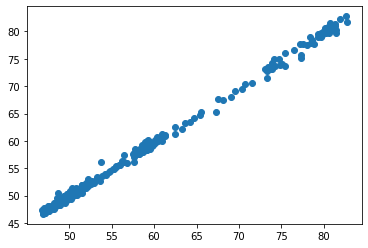

In [108]:
plt.scatter(y_test,predi)